In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/Waste_Management_and_Recycling_India.csv")

In [4]:
print("Shape:", df.shape)
print(df.columns)
print(df.dtypes)

Shape: (850, 13)
Index(['City/District', 'Waste Type', 'Waste Generated (Tons/Day)',
       'Recycling Rate (%)', 'Population Density (People/km²)',
       'Municipal Efficiency Score (1-10)', 'Disposal Method',
       'Cost of Waste Management (₹/Ton)', 'Awareness Campaigns Count',
       'Landfill Name', 'Landfill Location (Lat, Long)',
       'Landfill Capacity (Tons)', 'Year'],
      dtype='object')
City/District                        object
Waste Type                           object
Waste Generated (Tons/Day)            int64
Recycling Rate (%)                    int64
Population Density (People/km²)       int64
Municipal Efficiency Score (1-10)     int64
Disposal Method                      object
Cost of Waste Management (₹/Ton)      int64
Awareness Campaigns Count             int64
Landfill Name                        object
Landfill Location (Lat, Long)        object
Landfill Capacity (Tons)              int64
Year                                  int64
dtype: object


In [5]:
print(df.isnull().sum())

City/District                        0
Waste Type                           0
Waste Generated (Tons/Day)           0
Recycling Rate (%)                   0
Population Density (People/km²)      0
Municipal Efficiency Score (1-10)    0
Disposal Method                      0
Cost of Waste Management (₹/Ton)     0
Awareness Campaigns Count            0
Landfill Name                        0
Landfill Location (Lat, Long)        0
Landfill Capacity (Tons)             0
Year                                 0
dtype: int64


C:\Users\Hrishi\AppData\Local\Temp\ipykernel_10628\3343309870.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_waste.values, y=city_waste.index, palette="viridis")


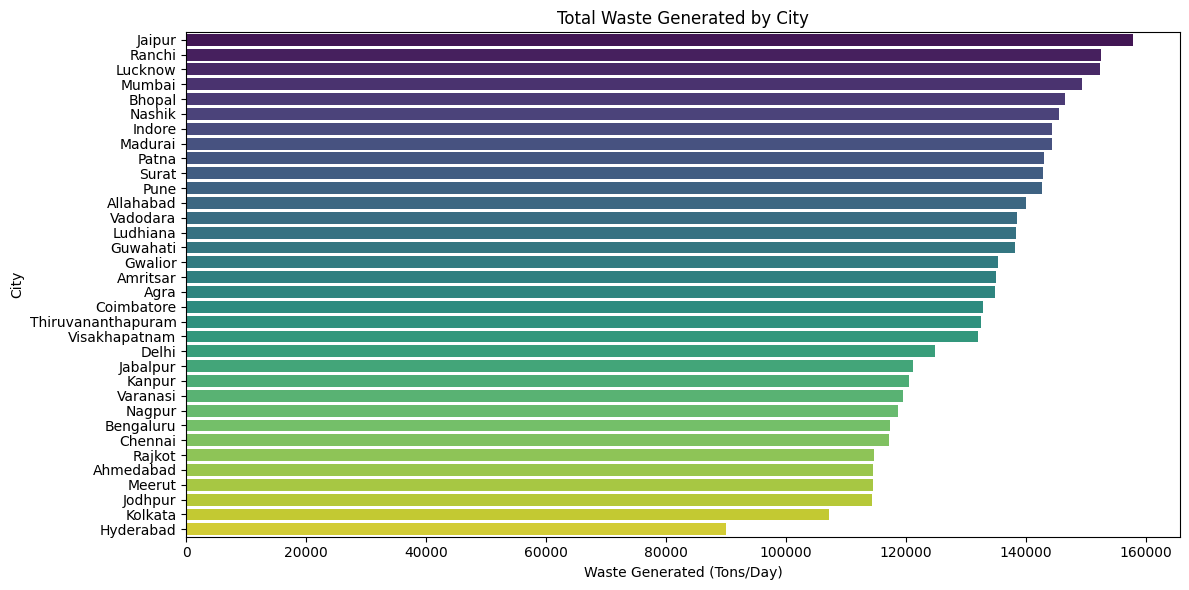

In [10]:
plt.figure(figsize=(12, 6))
city_waste = df.groupby('City/District')['Waste Generated (Tons/Day)'].sum().sort_values(ascending=False)
sns.barplot(x=city_waste.values, y=city_waste.index, palette="viridis")
plt.title("Total Waste Generated by City")
plt.xlabel("Waste Generated (Tons/Day)")
plt.ylabel("City")
plt.tight_layout()
plt.show()

C:\Users\Hrishi\AppData\Local\Temp\ipykernel_10628\2869605127.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_recycling.values, y=type_recycling.index, palette="magma")


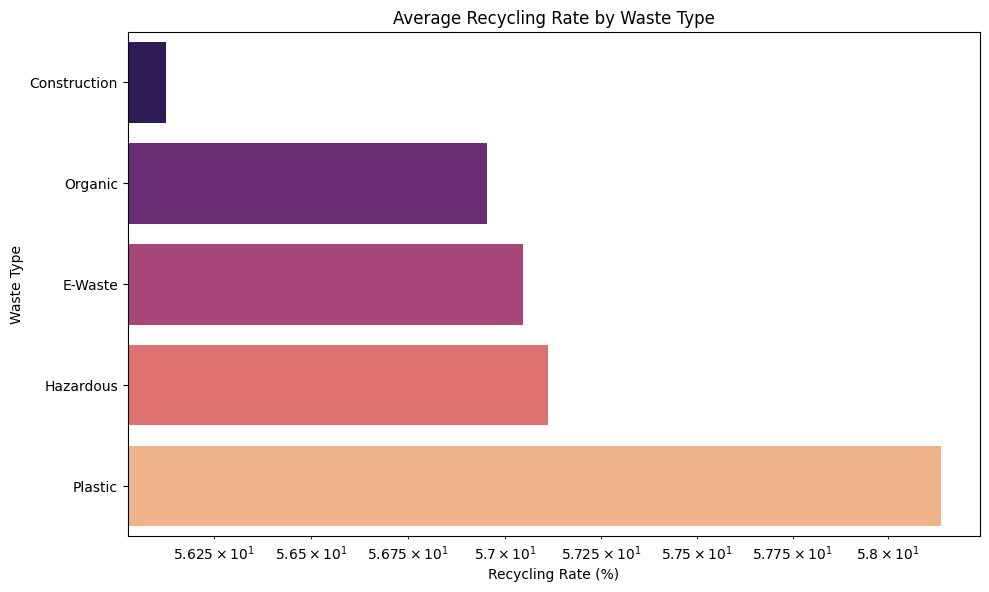

In [33]:
plt.figure(figsize=(10, 6))
type_recycling = df.groupby('Waste Type')['Recycling Rate (%)'].mean().sort_values()
sns.barplot(x=type_recycling.values, y=type_recycling.index, palette="magma")
plt.title("Average Recycling Rate by Waste Type")
plt.xlabel("Recycling Rate (%)")
plt.ylabel("Waste Type")
plt.tight_layout()
plt.xscale('log')
plt.show()

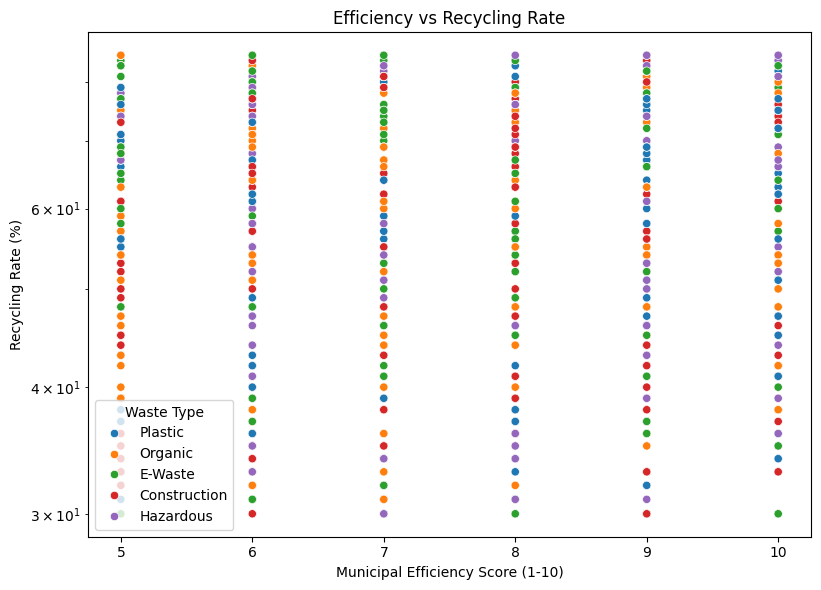

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Municipal Efficiency Score (1-10)', y='Recycling Rate (%)', hue='Waste Type')
plt.title("Efficiency vs Recycling Rate")
plt.tight_layout()
plt.show()

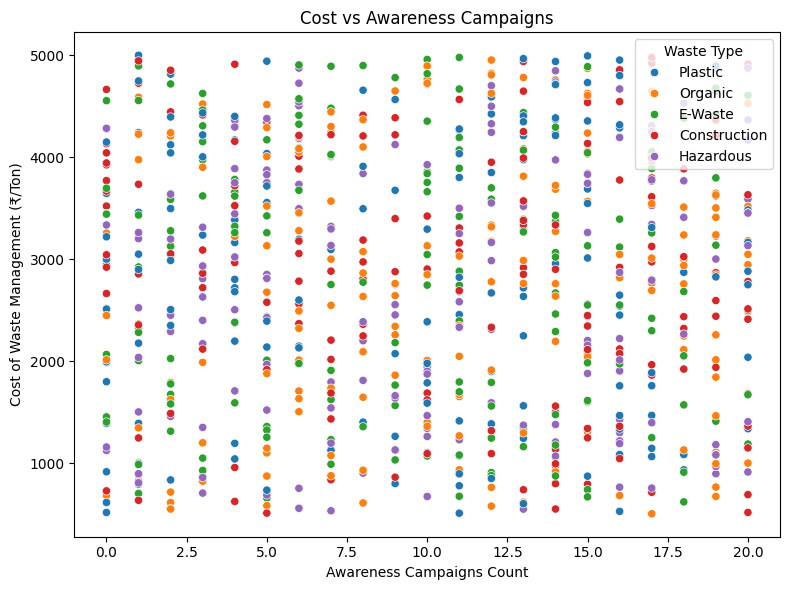

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Awareness Campaigns Count', y='Cost of Waste Management (₹/Ton)', hue='Waste Type')
plt.title("Cost vs Awareness Campaigns")
plt.tight_layout()
plt.show()

In [14]:
df.to_csv("../data/cleaned_waste_data.csv", index=False)

In [ ]:
df['waste_per_capita'] = df['Waste Generated (Tons/Day)'] / (df['Population Density (People/km²)'] + 1)

df['cost_per_campaign'] = df['Cost of Waste Management (₹/Ton)'] / (df['Awareness Campaigns Count'] + 1)

df['recycling_efficiency'] = (df['Recycling Rate (%)'] / 100) * df['Waste Generated (Tons/Day)']


In [25]:
top_eff = df.sort_values("Municipal Efficiency Score (1-10)", ascending=False)
print(top_eff[['City/District', 'Municipal Efficiency Score (1-10)', 'Recycling Rate (%)']].head(10))


          City/District  Municipal Efficiency Score (1-10)  Recycling Rate (%)
7                Mumbai                                 10                  57
830             Gwalior                                 10                  62
390  Thiruvananthapuram                                 10                  65
394  Thiruvananthapuram                                 10                  84
399  Thiruvananthapuram                                 10                  34
402              Indore                                 10                  38
403              Indore                                 10                  54
410              Indore                                 10                  81
412              Indore                                 10                  66
786           Allahabad                                 10                  53


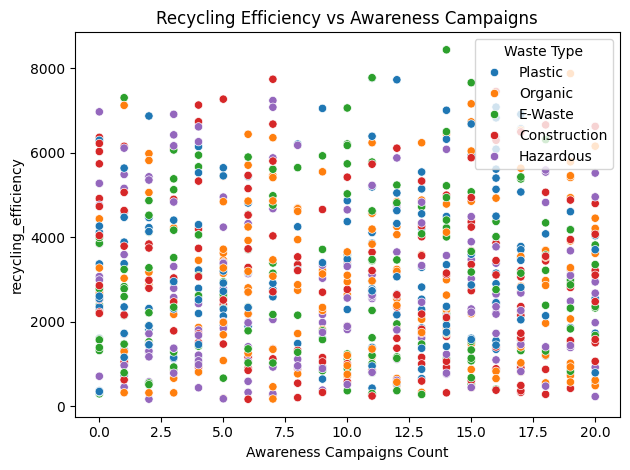

In [27]:
sns.scatterplot(data=df, x="Awareness Campaigns Count", y="recycling_efficiency", hue="Waste Type")
plt.title("Recycling Efficiency vs Awareness Campaigns")
plt.tight_layout()
plt.show()

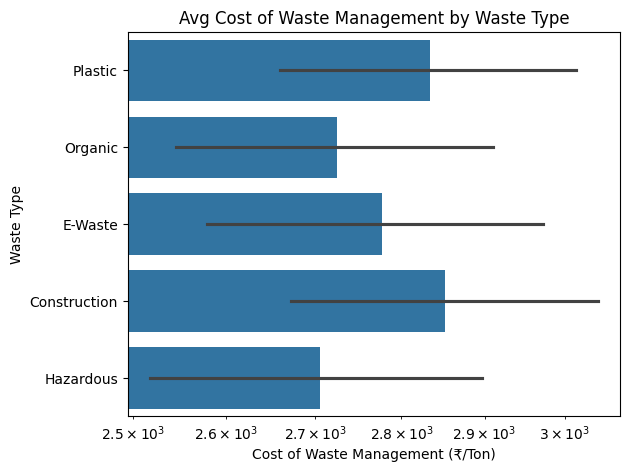

In [32]:
sns.barplot(data=df, x='Cost of Waste Management (₹/Ton)', y='Waste Type', estimator='mean')
plt.title("Avg Cost of Waste Management by Waste Type")
plt.tight_layout()
plt.xscale('log')
plt.show()

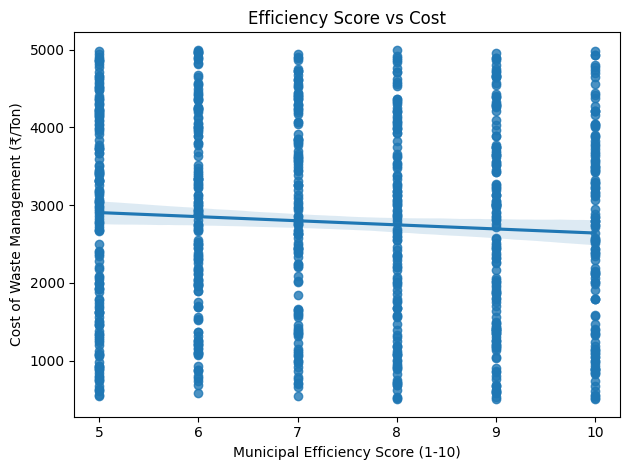

In [29]:
sns.regplot(data=df, x="Municipal Efficiency Score (1-10)", y="Cost of Waste Management (₹/Ton)")
plt.title("Efficiency Score vs Cost")
plt.tight_layout()
plt.show()